# Capstone Project - The Battle of Neighborhoods
Introduction/Business Problem

Introduction where you discuss the business problem and who would be interested in this project.
"Would you recommend a location in NAVI MUMBAI to open a new cinema?"

My FRIEND, an investor  wants to open a new cinema as company's new business and ask me this question.

He explains that in customer point of view, watching movie is a part of whole afternoon or night activities. 
Cinema should has many restaurants and shopping places nearby. Transportation is also an important factor. 
Customer can walk to cinema within 5 minutes from public transport facilities such as bus stop and metro station.

He wants me to concentrate on selection of cinema location according to its nearby environment. 
Cinema facility and rental price is not my concern. He lists out his top 10 favorite cinemas in Navi Mumbai with rating.

I work with my teammates and select 5 possible locations to build the cinema. Which location should be suggested to the stakeholder?
Data

Data where you describe the data that will be used to solve the problem and the source of the data.

According to the question, I need to find following data to resolve the problem.
1. Geographic coordinate of Navi Mumbai cinemas

I need to compare 5 possible locations with current cinemas in Navi Mumbai . Therefore, I need to find a list of Navi Mumbai cinema and cinemas' geographic coordinates. Luckily, I can find the list and coordinates from the four Square site .


import json
import pandas as pd

In [86]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [3]:
!wget -O nm_cinema_list.json https://api.foursquare.com/v2/venues/'search?client_id=F23C4BLZGSLMLBAOWOQQRMMPFCONA4CKK1PKECIRBZLMNRNP&client_secret=21QK1EMVHG2FJIAHKFRV40TFLIJWMTKC4TST0FAOUNXV0SI4&v=20180602&ll=19.0330,73.0297&query=cinema'

--2019-09-27 10:14:37--  https://api.foursquare.com/v2/venues/search?client_id=F23C4BLZGSLMLBAOWOQQRMMPFCONA4CKK1PKECIRBZLMNRNP&client_secret=21QK1EMVHG2FJIAHKFRV40TFLIJWMTKC4TST0FAOUNXV0SI4&v=20180602&ll=19.0330,73.0297&query=cinema
Resolving api.foursquare.com (api.foursquare.com)... 151.101.62.202
Connecting to api.foursquare.com (api.foursquare.com)|151.101.62.202|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20774 (20K) [application/json]
Saving to: ‘nm_cinema_list.json’

100%[======================================>] 20,774      --.-K/s   in 0.002s  

2019-09-27 10:14:37 (12.7 MB/s) - ‘nm_cinema_list.json’ saved [20774/20774]



In [124]:
cinemas_json = None
with open('nm_cinema_list.json', 'r') as f:
    cinemas_json = json.load(f)
    
cinemas = []
#print(cinemas_json)
for data in cinemas_json['response']['venues']:
    #print(data['id'])
    cinemas.append({
        'Name': data['name'],
        'id': data['id'],
        'Latitude': data['location']['lat'],
        'Longitude': data['location']['lng'],
                'Distance': data['location']['distance'],'Categories':data['categories']
        

    })
df_cinemas = pd.DataFrame(cinemas, columns=['Name','id','Latitude','Longitude','Distance','Categories'])#,'Address','Latitude','Longitude'])
df_cinemas

,Name,id,Latitude,Longitude,Distance,Categories
0,Raghuleela Inox Cinema,4e5df0c888771c94688a14f4,19.064052,72.997117,4868,"[{'id': '4bf58dd8d48988d180941735', 'name': 'M..."
1,Le Rêve (Globus Cinema),580db3c938fa83fae8815919,19.056014,72.833951,20756,"[{'id': '4bf58dd8d48988d17e941735', 'name': 'I..."
2,Gaiety Cinema,4ddce24c1f6e54b34d937cdd,19.061642,72.838771,20341,"[{'id': '4bf58dd8d48988d180941735', 'name': 'M..."
3,Carnival Cinema-Red Lounge,55671b19498e019762ef5e41,19.146801,72.937332,15965,"[{'id': '4bf58dd8d48988d180941735', 'name': 'M..."
4,Square Digital Cinema,51e565c6498e8fc6c884ff88,19.046111,73.072599,4744,"[{'id': '4bf58dd8d48988d17f941735', 'name': 'M..."
5,Maxus Cinema,50cf14c0e4b0f2cbe4cb38ad,19.042301,73.077429,5128,"[{'id': '4bf58dd8d48988d180941735', 'name': 'M..."
6,Meghdoot Cinema Hall,4e2c3f9a483bb05f05a67226,19.072828,72.998086,5542,"[{'id': '4bf58dd8d48988d17e941735', 'name': 'I..."
7,Big Cinema@ Galleria,4df44cc5b0fb807158c591c4,19.080369,73.002525,5998,"[{'id': '4bf58dd8d48988d180941735', 'name': 'M..."
8,Meghraj Cinema,4e2c4960b0fbc2edac2a626e,19.073725,72.996578,5718,"[{'id': '4bf58dd8d48988d17e941735', 'name': 'I..."
9,Big Cinema,4b80bc9ef964a520448930e3,19.084814,73.007386,6227,"[{'id': '4bf58dd8d48988d180941735', 'name': 'M..."


In [77]:
print('There are {} cinemas in Navi Mumbai'.format(len(df_cinemas)))

There are 30 cinemas in Navi Mumbai


## Top 5 Closest Cinema 

In [84]:
df_cinemas.sort_values('Distance').head()


,Name,id,Latitude,Longitude,Distance
4,Square Digital Cinema,51e565c6498e8fc6c884ff88,19.046111,73.072599,4744
0,Raghuleela Inox Cinema,4e5df0c888771c94688a14f4,19.064052,72.997117,4868
5,Maxus Cinema,50cf14c0e4b0f2cbe4cb38ad,19.042301,73.077429,5128
6,Meghdoot Cinema Hall,4e2c3f9a483bb05f05a67226,19.072828,72.998086,5542
8,Meghraj Cinema,4e2c4960b0fbc2edac2a626e,19.073725,72.996578,5718


In [21]:
!pip install -U googlemaps

In [28]:
dis_favorite = [
    {'Name': 'PVR Cinemas', 'Rating': 4.5},
    {'Name': 'UFO Digital Cinema', 'Rating': 4.5},
    {'Name': 'Square Digital Cinema', 'Rating': 4.3},
    {'Name': 'Raghuleela Inox Cinema', 'Rating': 4.3},
    {'Name': 'Metro Big Cinemas', 'Rating': 4.3},
    {'Name': 'Basant Cinema', 'Rating': 4.2},

]


# Favorite cinema list for My Investor Friend

In [29]:
df_dis_favorite = pd.DataFrame(dis_favorite, columns=['Name','Rating'])

In [30]:
df_dis_favorite

,Name,Rating
0,PVR Cinemas,4.5
1,UFO Digital Cinema,4.5
2,Square Digital Cinema,4.3
3,Raghuleela Inox Cinema,4.3
4,Metro Big Cinemas,4.3
5,Basant Cinema,4.2


In [31]:
cinema = df_cinemas.loc[0]

In [32]:
print('Use the first cinema "{}" in the list as example to explore venues nearyby'.format(cinema['Name']))

Use the first cinema "Raghuleela Inox Cinema" in the list as example to explore venues nearyby


In [33]:
fs_categories = {
    'Food': '4d4b7105d754a06374d81259',
    'Shop & Service': '4d4b7105d754a06378d81259',
    'Bus Stop': '52f2ab2ebcbc57f1066b8b4f',
    'Metro Station': '4bf58dd8d48988d1fd931735',
    'Nightlife Spot': '4d4b7105d754a06376d81259',
    'Arts & Entertainment': '4d4b7104d754a06370d81259'
}

In [34]:
!pip install foursquare

  Stored in directory: /home/dsxuser/.cache/pip/wheels/53/6c/d9/0810f42ef7521037af97032caab9411144ab0efab2aed8300f
Successfully built foursquare


In [42]:
fs_act = None
with open('https://eu-gb.dataplatform.cloud.ibm.com/projects/4751fbd1-82c3-4fd7-b403-ab18f732a409/data-assets/1c18756c-80f3-4dc3-80dd-798e039e0c2e/preview?context=data&label=true') as json_data:
    fs_act = json.load(json_data)

FileNotFoundError: [Errno 2] No such file or directory: 'https://eu-gb.dataplatform.cloud.ibm.com/projects/4751fbd1-82c3-4fd7-b403-ab18f732a409/data-assets/1c18756c-80f3-4dc3-80dd-798e039e0c2e/preview?context=data&label=true'

In [63]:
#import foursquare
#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
#fs = foursquare.Foursquare(client_id=df_cinemas['F23C4BLZGSLMLBAOWOQQRMMPFCONA4CKK1PKECIRBZLMNRNP'], client_secret=df_cinemas['21QK1EMVHG2FJIAHKFRV40TFLIJWMTKC4TST0FAOUNXV0SI4'])
neighborhood_latitude=19.0330
neighborhood_longitude=73.0297
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
"""url = 'https://api.foursquare.com/v2/venues/explore?&client_id=F23C4BLZGSLMLBAOWOQQRMMPFCONA4CKK1PKECIRBZLMNRNP&client_secret=21QK1EMVHG2FJIAHKFRV40TFLIJWMTKC4TST0FAOUNXV0SI4&v=20180602&ll={},{}&radius={}&limit={}'.format(

    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)"""
url="https://api.foursquare.com/v2/venues/explore?&client_id=F23C4BLZGSLMLBAOWOQQRMMPFCONA4CKK1PKECIRBZLMNRNP&client_secret=21QK1EMVHG2FJIAHKFRV40TFLIJWMTKC4TST0FAOUNXV0SI4&v=20180602&ll=19.0330,73.0297&radius=500&limit=100"
url # display URL



'https://api.foursquare.com/v2/venues/explore?&client_id=F23C4BLZGSLMLBAOWOQQRMMPFCONA4CKK1PKECIRBZLMNRNP&client_secret=21QK1EMVHG2FJIAHKFRV40TFLIJWMTKC4TST0FAOUNXV0SI4&v=20180602&ll=19.0330,73.0297&radius=500&limit=100'

In [64]:
import requests 
results = requests.get(url).json()



In [65]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Trying to find nearby venue from each category 

In [66]:


venues = results['response']['groups'][0]['items']
NMnearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.distance']
NMnearby_venues =NMnearby_venues.loc[:, filtered_columns]
# filter the category for each row
NMnearby_venues['venue.categories'] = NMnearby_venues.apply(get_category_type, axis=1)
# clean columns
NMnearby_venues.columns = [col.split(".")[-1] for col in NMnearby_venues.columns]

NMnearby_venues.shape



(8, 5)

In [67]:
NMnearby_venues.head(10)

,name,categories,lat,lng,distance
0,Chavana Spa,Gym / Fitness Center,19.032892,73.029589,16
1,Blossom,Fast Food Restaurant,19.032595,73.029421,53
2,Guitar Hall – Guitar Academy And Boutique™ - N...,Music Venue,19.034091,73.028983,142
3,Martinez,Chinese Restaurant,19.029770,73.030586,371
4,CBD Belapur Nursery - Valley Park,Park,19.032099,73.033504,412
5,'Archies' Paper Rose Shoppe,Gift Shop,19.033178,73.025516,440
6,BOOK MART,Bookstore,19.033797,73.025501,450
7,Safal Complex,Residential Building (Apartment / Condo),19.033917,73.025433,460


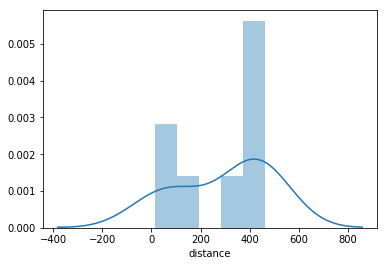

In [71]:


import seaborn as sns
sns.distplot(NMnearby_venues['distance'],bins=5)



In [128]:
for lat, lng, label in zip(df_cinemas.Latitude, df_cinemas.Longitude, df_cinemas.Distance):
    print(lat,lng,label)


19.064051732851663 72.99711690858199 4868
19.056014292525585 72.8339514796647 20756
19.061641809489494 72.83877132004936 20341
19.146800994873047 72.93733215332031 15965
19.046111304632102 73.07259853402361 4744
19.042301320443787 73.07742879942131 5128
19.072828445731716 72.9980855892478 5542
19.080368993016933 73.0025253244989 5998
19.073724651847314 72.99657826252236 5718
19.08481396646335 73.00738587337767 6227
19.012305 73.08983 6734
18.997191037988834 73.1254607881081 10837
19.006030890473472 72.83092978861823 21133
19.009399731575236 73.10880576585781 8729
19.23231466645261 72.82884894507445 30634
19.03151840751088 72.88070130965667 15680
18.960002765578004 72.81918761124199 23600
19.21728777409486 72.98095360934234 21145
19.114637419145645 72.82745181542894 23137
18.943304149956862 72.82889749328402 23376
19.093729553966806 72.88362748787071 16789
19.042931 72.90638 13023
18.99505902053539 72.82367377641894 22090
19.165958 73.07591 15578
19.013330776682377 72.84405612371714 196

In [132]:
latitude=19.0330
longitude=73.0297
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Ye',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(df_cinemas.Latitude, df_cinemas.Longitude, str(df_cinemas.Distance)):
    folium.features.CircleMarker(
        [latitude, longitude],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### Target Achievement

The request was satisfied as Top 5 Closest cinema

## Conclusion
    Gym / Fitness Center,Fast Food Restaurant, Music Venue are near but all remaining venues are double the distances